<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Word2Vec </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> 1. Word2Vec conceptos </FONT>

- El enfoque de incrustación (embedding) fue desarrollado por Tomas Mikolov en el año 2013. En otras palabras, es una forma de representar vectorialmente una palabra en particular.

- El enfoque de ***Word2Vec*** utiliza técnicas basadas en aprendizaje profundo y redes neuronales para convertir *palabras en vectores* correspondientes de tal manera que los vectores semánticamente similares estén cerca uno del otro en un espacio N-dimensional, donde N se refiere a las dimensiones del vector.

- Esta técnica es capaz de captar el contexto de una palabra en un documento, similitud semántica y sintáctica, relación con otras palabras, etc.

- La capacidad de ***Word2Vec*** para mantener la relación semántica se refleja en un ejemplo clásico en el que si tiene un vector para la palabra "Rey" y elimina el vector representado por la palabra "Hombre" del "Rey" y le agrega "Mujer", se debería obtener un vector que esté cerca del vector "Reina". Esta relación se representa comúnmente como:

**King - Man + Women = Queen**

El modelo Word2Vec tiene dos versiones:

- Skip Gram Model

- Continuous Bag of Words Model (CBOW).

***Modelo CBOW**: se toma el contexto de cada palabra como la entrada y se intenta predecir la palabra correspondiente. Por ejemplo, predecirá "to", si las palabras de contexto "love" y "dance" se introducen como entrada al modelo.

***Modelo Skip Gram***: se toma la palabra base y se predicen las palabras del contexto. Por ejemplo, dada una oración "I love to dance in the rain", el modelo *skip gram* predecirá "love" y "dance" dada la palabra "to" como entrada.

**Pros y contras de Word2Vec**

- Word2Vec tiene varias ventajas sobre la bolsa de palabras y el esquema IF-IDF.

- Word2Vec conserva el significado semántico de diferentes palabras en un documento.

- La información de contexto no se pierde.

- Otra gran ventaja del enfoque de Word2Vec es que el tamaño del vector incrustado es muy pequeño.

- Cada dimensión del vector incrustado contiene información sobre un aspecto de la palabra.

No necesitamos enormes vectores dispersos, a diferencia de la bolsa de palabras y TF-IDF.

Nota: Los detalles matemáticos de cómo funciona Word2Vec implican una explicación de las redes neuronales y la probabilidad softmax. Como referencia este documento: https://arxiv.org/abs/1301.3781





## Recordemos

- El objetivo en una representación vectorial es que las palabras con un contexto similar ocupen posiciones espaciales vectoriales cercanas.

- Es aquí donde entra en juego, un conceptos que vimos en un cuaderno anterior denominado la distancia del coseno.

- Matemáticamente, el coseno del ángulo entre tales vectores debe ser cercano a 1, es decir, un ángulo cercano a 0.

- Además, la similaridad del coseno es

$$similarity(u,v) = \cos \theta =\dfrac{u.v}{\|u\|\|v\|}$$



# <FONT SIZE=5 COLOR="purple"> Funcionamiento de Word2Vec </FONT>

- Se puede consultar este artículo como referencia
[artículo_word2vec](https://arxiv.org/pdf/1411.2738.pdf)

- Para el modelo *CBOW* la arquitectura de la red neuronal es la siguiente:

<center><img src="https://i.stack.imgur.com/sAvR9.png" alt="centered image" width="500" height="300"></center>

- La entrada o la palabra de contexto es un vector codificado de cierto tamaño. La capa oculta contiene $N$ neuronas y la salida nuevamente un vecor de longitud igual a la de entrada con el elementos de los valores *softmax*.

- $W_{v\times N}$ es la matriz de ponderación que asigna la entrada $x$ a la capa oculta.

- $W'_{N \times v}$ es la matriz de ponderación que asigna las salidas de la capa oculta a la salida fina.

- Las neuronas de la capa oculpa copian la suma ponderada de entradas a la siguiente capa.

- Ahora bien, esto es con una palabra, pero la idea es tener en cuenta varias palabras de contexto.

<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/imaw2v1.png?raw=true" alt="centered image" width="400" height="500"></center>

- En la gráfica anterior se toman los promedios sobre todas las entradas de contexto.


- Para el modelo *skip-gram* la arquitectura de la red neuronal es la siguiente:


<center><img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*Ta3qx5CQsrJloyCA.png" alt="centered image" width="300" height="500"></center>

- En este caso se introduce la palabra objetivo en la red. El modelo genera distribuciones de probabilidad para posición de contexto.


# <FONT SIZE=5 COLOR="purple"> Funcionamiento de Word2Vec </FONT>

Considere la información de la siguiente página web

https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

El objetivo del ejercicio es usar la herramienta ***word2vec*** para analizar similaridad entre palabras en un determinado contexto.

Importamos algunas librerías que usaremos para tokenización del texto.

In [ ]:
import nltk
nltk.download('punkt')
print("El punkt tokenizer esta descargado")

El punkt tokenizer esta descargado


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Para cargar los datos

In [ ]:
#para importar la librería pandas.
import pandas as pd

Revisemos los datos como un data.frame

In [ ]:
amazon = pd.read_json("AMAZON_FASHION.json.gz", lines=True)
print("Listo, datos cargados")

Listo, datos cargados


In [ ]:
amazon.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


Tamaño de los datos

In [ ]:
amazon.shape

(883636, 12)

In [ ]:
# Ver información de los datos
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         883636 non-null  int64  
 1   verified        883636 non-null  bool   
 2   reviewTime      883636 non-null  object 
 3   reviewerID      883636 non-null  object 
 4   asin            883636 non-null  object 
 5   reviewerName    883544 non-null  object 
 6   reviewText      882403 non-null  object 
 7   summary         883103 non-null  object 
 8   unixReviewTime  883636 non-null  int64  
 9   vote            79900 non-null   float64
 10  style           304569 non-null  object 
 11  image           28807 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 75.0+ MB


In [ ]:
# Vamos a eliminar los datos faltantes de la variable de interés.
amazon.reviewText.dropna()

0                                    Exactly what I needed.
1         I agree with the other review, the opening is ...
2         Love these... I am going to order another pack...
3                                       too tiny an opening
4                                                      Okay
                                ...                        
883631    I absolutely love this dress!!  It's sexy and ...
883632    I'm 5'6 175lbs. I'm on the tall side. I wear a...
883633                           Too big in the chest area!
883634                  Too clear in the back, needs lining
883635    Ordered and was slightly small. Worked with th...
Name: reviewText, Length: 882403, dtype: object

In [ ]:
# Convertir los review en una cadena e imprimimos la longitud
amazon_corpus = ''.join(amazon['reviewText'].dropna()+" ")
print("El corpus contiene {0:,} caracteres".format(len(amazon_corpus)))

El corpus contiene 131,293,159 caracteres


In [ ]:
# Cargar el tokenizados
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("El punkt tokenizer está cargado")
# Vamos a tokenizar en sentencias.
amazon_sentences = tokenizer.tokenize(amazon_corpus)
print("Tenemos {0:,} sentencias".format(len(amazon_sentences)))

El punkt tokenizer está cargado
Tenemos 2,063,883 sentencias


In [ ]:
import re
# Limpiar y dividie las sentencias en palabras.
def clean_and_split_str(string):
    string = string.lower()
    patron = re.compile("[^A-Za-z]+")
    string = re.sub(patron, " ", string)
    return string.strip().split()

In [ ]:
# Limpiar y construir la lista de sentencias
sentences = []
for amazon_sent in amazon_sentences:
    if len(amazon_sent) > 0:
        sentences.append(clean_and_split_str(amazon_sent))
print("Tenemos {0:,} sentences limpias".format(len(sentences)))

Tenemos 2,063,883 sentences limpias


In [ ]:
#Revisar algunos valores
amazon_sentences[1]

'I agree with the other review, the opening is too small.'

In [ ]:
sentences[1]

['i',
 'agree',
 'with',
 'the',
 'other',
 'review',
 'the',
 'opening',
 'is',
 'too',
 'small']

In [ ]:
token_count = sum([len(sentence) for sentence in sentences])
print("El corpus contiene {0:,} tokens".format(token_count))

El corpus contiene 25,304,351 tokens


In [ ]:
# Importar y generar el modelo
from gensim.models import Word2Vec
word2vec = Word2Vec(sentences, min_count=2)
word2vec.save("amazon.model.w2v")
print("Modelo guardado")

Modelo guardado


In [ ]:
# veamos el tamaño : recordemos que por defector gemsin trabaja con 100.
vocabulary = word2vec
print(vocabulary)

Word2Vec<vocab=41390, vector_size=100, alpha=0.025>


In [ ]:
# revisemos la similitud de algunas palabras
sim_words = word2vec.wv.most_similar('shirt')
sim_words

[('blouse', 0.8274722695350647),
 ('sweater', 0.8185929656028748),
 ('vest', 0.8144235014915466),
 ('jacket', 0.798116147518158),
 ('hoodie', 0.7890953421592712),
 ('sweatshirt', 0.7866309285163879),
 ('dress', 0.7461386919021606),
 ('coat', 0.7339488863945007),
 ('tshirt', 0.7307121753692627),
 ('robe', 0.7238878607749939)]

In [ ]:
# otro ejemplo de similitud
sim_words = word2vec.wv.most_similar('panties')
sim_words

[('undies', 0.8039863705635071),
 ('underwear', 0.79067462682724),
 ('shorts', 0.7663733959197998),
 ('thongs', 0.7604132890701294),
 ('bras', 0.7328122854232788),
 ('pants', 0.7305120229721069),
 ('stockings', 0.7179613709449768),
 ('bikinis', 0.7150813341140747),
 ('briefs', 0.7127700448036194),
 ('tanks', 0.7074708342552185)]

In [ ]:
# podemos imprimir algunas similaridades entre palabras con base al corpus
print(word2vec.wv.similarity("men", "women"))
print(word2vec.wv.similarity("fashion", "women"))
print(word2vec.wv.similarity("panties", "undies"))

0.82015973
0.3129179
0.8039863


In [ ]:
# Podemos determinar en una lista cuál es la palabra que no encaga
lista1 = "women fashion panties undies shoes".split()
print('en la lista', ' '.join(lista1), 'sobra:', word2vec.wv.doesnt_match(lista1))

en la lista women fashion panties undies shoes sobra: women


In [ ]:
# Otro ejemplo de una palabra que no encaja
lista2 = "mall shirt panties undies shoes".split()
print('en la lista', ' '.join(lista2), 'sobra:', word2vec.wv.doesnt_match(lista2))

en la lista mall shirt panties undies shoes sobra: mall


In [ ]:
# Podemos revisar similaridades
terminos = 'shirt undies shoes panties'.split()

for t in terminos:
    print(t, '==>', word2vec.wv.most_similar(t), '\n')

shirt ==> [('blouse', 0.8274722695350647), ('sweater', 0.8185929656028748), ('vest', 0.8144235014915466), ('jacket', 0.798116147518158), ('hoodie', 0.7890953421592712), ('sweatshirt', 0.7866309285163879), ('dress', 0.7461386919021606), ('coat', 0.7339488863945007), ('tshirt', 0.7307121753692627), ('robe', 0.7238878607749939)] 

undies ==> [('underwear', 0.834334135055542), ('panties', 0.8039863705635071), ('socks', 0.7360397577285767), ('scrubs', 0.7326096296310425), ('boxers', 0.7243353724479675), ('undershirts', 0.723609447479248), ('underpants', 0.7217085361480713), ('sox', 0.7050623893737793), ('jammies', 0.6824495792388916), ('pjs', 0.6800859570503235)] 

shoes ==> [('sneakers', 0.8804169297218323), ('sandals', 0.8091031312942505), ('socks', 0.8063241243362427), ('boots', 0.7983628511428833), ('slippers', 0.7891514897346497), ('cleats', 0.7735031247138977), ('crocs', 0.7406205534934998), ('clogs', 0.7225227952003479), ('insoles', 0.692026674747467), ('shoe', 0.6857488751411438)] 


In [ ]:
# recordemos la ecuación fundamental de word2vec
most_similar = word2vec.wv.most_similar(positive=['panties', 'women'], negative=['men'], topn=5)
for item in most_similar:
    print(item)

('bras', 0.7010918259620667)
('shorts', 0.6925181150436401)
('thongs', 0.6850661039352417)
('undies', 0.6775850653648376)
('tanks', 0.6729863286018372)


# <FONT SIZE=5 COLOR="purple"> Ejercicio en Clase </FONT>

1. Seleccionar uno de los conjuntos de review de Amazon.

Se selecciono el conjunto de datos de Video Games review de amazon.

In [ ]:
games = pd.read_json("Video_Games.json.gz", lines=True)
print("Listo, datos cargados")

Listo, datos cargados


In [ ]:
games.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


In [ ]:
games.shape

(2565349, 12)

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565349 entries, 0 to 2565348
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   reviewerName    object
 6   reviewText      object
 7   summary         object
 8   unixReviewTime  int64 
 9   vote            object
 10  style           object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 217.7+ MB


In [ ]:
games.reviewText.dropna()

0          I used to play this game years ago and loved i...
1          The game itself worked great but the story lin...
2          I had to learn the hard way after ordering thi...
3          The product description should state this clea...
4          I would recommend this learning game for anyon...
                                 ...                        
2565344                                   Love it, work good
2565345    I do a lot of copy/paste and other keyboard sh...
2565346    One year in and it's still working great!  Hig...
2565347                                            EXCELENTE
2565348    Haven't really used it too much but dang this ...
Name: reviewText, Length: 2563634, dtype: object

In [ ]:
# Convertir los review en una cadena e imprimimos la longitud
games_corpus = ''.join(games['reviewText'].dropna()+" ")
print("El corpus contiene {0:,} caracteres".format(len(games_corpus)))

El corpus contiene 1,030,701,989 caracteres


In [ ]:
# Cargar el tokenizados
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("El punkt tokenizer está cargado")
# Vamos a tokenizar en sentencias.
games_sentences = tokenizer.tokenize(games_corpus)
print("Tenemos {0:,} sentencias".format(len(games_sentences)))

El punkt tokenizer está cargado
Tenemos 11,830,387 sentencias


In [ ]:
# Limpiar y construir la lista de sentencias
sentencias = []
for game_sent in games_sentences:
    if len(game_sent) > 0:
        sentencias.append(clean_and_split_str(game_sent))
print("Tenemos {0:,} sentences limpias".format(len(sentencias)))

Tenemos 11,830,387 sentences limpias


In [ ]:
#Revisar algunos valores
games_sentences[1]

'I found this did not work on my computer even though it said it would work with Windows 7.'

In [ ]:
sentencias[1]

['i',
 'found',
 'this',
 'did',
 'not',
 'work',
 'on',
 'my',
 'computer',
 'even',
 'though',
 'it',
 'said',
 'it',
 'would',
 'work',
 'with',
 'windows']

In [ ]:
toke_count = sum([len(sentence) for sentence in sentencias])
print("El corpus contiene {0:,} tokens".format(toke_count))

El corpus contiene 193,070,428 tokens


In [ ]:
from gensim.models import Word2Vec


Modelo guardado


2. Replicar el ejercicio de clase buscando la similitud entre algunas palabras de interés

In [ ]:
vocabulary = word2vect
print(vocabulary)

Word2Vec<vocab=167009, vector_size=100, alpha=0.025>


In [ ]:
sim_words = word2vect.wv.most_similar('game')
sim_words

[('title', 0.7347850799560547),
 ('campaign', 0.5946429967880249),
 ('franchise', 0.583501398563385),
 ('installment', 0.5593091249465942),
 ('gane', 0.5364494323730469),
 ('storyline', 0.5269988775253296),
 ('series', 0.5183365345001221),
 ('product', 0.5133069157600403),
 ('games', 0.5078958868980408),
 ('gameplay', 0.504209041595459)]

In [ ]:
sim_words = word2vect.wv.most_similar('computer')
sim_words

[('laptop', 0.874333918094635),
 ('desktop', 0.8379617929458618),
 ('comp', 0.8335500955581665),
 ('computor', 0.7811821103096008),
 ('imac', 0.7649946212768555),
 ('mbp', 0.7625943422317505),
 ('netbook', 0.7578901648521423),
 ('pc', 0.7498811483383179),
 ('puter', 0.7225911617279053),
 ('firewall', 0.6987571120262146)]

In [ ]:
sim_words = word2vect.wv.most_similar('good')
sim_words

[('decent', 0.8261401653289795),
 ('great', 0.8144500851631165),
 ('nice', 0.745535135269165),
 ('cool', 0.7088028192520142),
 ('solid', 0.6914446353912354),
 ('bad', 0.68892902135849),
 ('terrific', 0.6872514486312866),
 ('fantastic', 0.6823651194572449),
 ('servicable', 0.669765055179596),
 ('fabulous', 0.6630020141601562)]

In [ ]:
sim_words = word2vect.wv.most_similar('windows')
sim_words

[('vista', 0.9046899676322937),
 ('mac', 0.8540325164794922),
 ('os', 0.8175138235092163),
 ('linux', 0.8030164241790771),
 ('winxp', 0.7980133891105652),
 ('osx', 0.7964044809341431),
 ('macos', 0.7692996859550476),
 ('ubuntu', 0.7497599720954895),
 ('bootcamp', 0.746224045753479),
 ('xp', 0.7227783203125)]

In [ ]:
print(word2vect.wv.similarity("game", "good"))
print(word2vect.wv.similarity("play", "love"))
print(word2vect.wv.similarity("windows", "mac"))

-0.081643716
0.20095073
0.8540325


In [ ]:
terminos = 'game play computer excelent'.split()

for t in terminos:
    print(t, '==>', word2vect.wv.most_similar(t), '\n')

game ==> [('title', 0.7347850799560547), ('campaign', 0.5946429967880249), ('franchise', 0.583501398563385), ('installment', 0.5593091249465942), ('gane', 0.5364494323730469), ('storyline', 0.5269988775253296), ('series', 0.5183365345001221), ('product', 0.5133069157600403), ('games', 0.5078958868980408), ('gameplay', 0.504209041595459)] 

play ==> [('paly', 0.6884085536003113), ('playing', 0.6533260345458984), ('compete', 0.6288175582885742), ('use', 0.61055588722229), ('connect', 0.5563495755195618), ('join', 0.5562708377838135), ('beat', 0.5335226655006409), ('communicate', 0.5221635103225708), ('authenticate', 0.5147876739501953), ('dedicate', 0.50995934009552)] 

computer ==> [('laptop', 0.874333918094635), ('desktop', 0.8379617929458618), ('comp', 0.8335500955581665), ('computor', 0.7811821103096008), ('imac', 0.7649946212768555), ('mbp', 0.7625943422317505), ('netbook', 0.7578901648521423), ('pc', 0.7498811483383179), ('puter', 0.7225911617279053), ('firewall', 0.698757112026214

3. Seleccionar una muestra de 10.000 filas, normalicar e indicar el top 10 de las palabras. Haga una nube de palabras con las frecuencias de las mismas.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
sample_size = 10000
games_sample = games.sample(sample_size, random_state=0)

In [ ]:
import re
from stop_words import get_stop_words
def cleanPLN(texto, idioma = "es"):
    # Pasar a minusculas
    texto = texto.lower()
    # Remover caracteres especiales y tildes
    texto = re.sub(r'[á]+', 'a', texto)
    texto = re.sub(r'[é]+', 'e', texto)
    texto = re.sub(r'[í]+', 'i', texto)
    texto = re.sub(r'[ó]+', 'o', texto)
    texto = re.sub(r'[úü]+', 'u', texto)
    texto = re.sub(r'[^A-Za-z\s]+', '', texto)
    # Tokenizar
    tokens = nltk.word_tokenize(texto)
    # Eliminar las stop.words y Dejar palabras con más de 3 caracteres
    stop_words=get_stop_words(idioma)
    tokens_clean = [palabras for palabras in tokens if len(palabras)>3 and (palabras not in stop_words)]
    # Regrese la cadena de texto simplificada.
    texto_limpio = ' '.join(tokens_clean)
    return texto_limpio

In [ ]:
# Eliminar vacios
games_sample = games_sample[games_sample['reviewText'] !='']
games_sample = games_sample.dropna(subset=['reviewText'])
# Normalizar el texto (convertir todo a minúsculas)
games_sample['reviewText'] = games_sample['reviewText'].astype(str)
games_sample['reviewText'] = games_sample['reviewText'].apply(lambda x: cleanPLN(x,'en'))

In [ ]:
# Tokenizar el texto y contar las frecuencias de las palabras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(games_sample['reviewText'])

In [ ]:
# Obtener las palabras más frecuentes
word_freq = list(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]

In [ ]:
# Crear una nube de palabras con las frecuencias
wordcloud_data = dict(word_freq)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

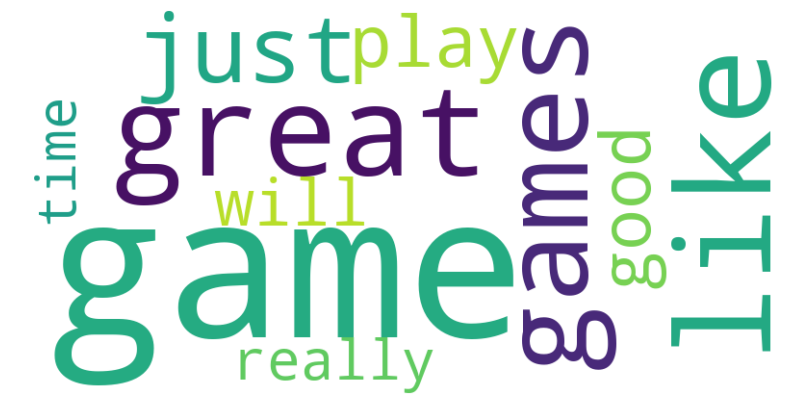

In [ ]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
games_word_freq = pd.DataFrame(word_freq, columns=['Palabra', 'Frecuencia'])
games_word_freq.head(10)

,Palabra,Frecuencia
0,game,11426
1,like,3468
2,great,3216
3,games,2920
4,just,2895
5,play,2671
6,good,2517
7,will,2163
8,really,2026
9,time,1879


## Elaborado por
- Dafne Valeria Castellanos
- Laura Valentina Gonzalez